In [3]:
!git clone https://github.com/sabiomito/uffgpu2019.git
%cd uffgpu2019/PROJETO

Cloning into 'uffgpu2019'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 135 (delta 67), reused 115 (delta 47), pack-reused 0
Receiving objects: 100% (135/135), 985.24 KiB | 1.28 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/uffgpu2019/PROJETO


In [0]:
!nvcc 3DstencilCPU.cpp  -o go
!./go

In [3]:
!nvcc 3DstencilGPUGlobalMemory.cu  -o go
!./go 512 512 160 2

^C


In [4]:
#0.59546
!nvcc 3DstencilGPUSharedMemory.cu -o go
!./go 32 32 4

X 32 || Y 32 
BX 32 || BY 32
GX 1 || GY 1
Z 4 
[4096,0.63600,-94503384.15656],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCpuBorder.cu  -o go
!./go 4 4 2 4

In [0]:
!nvcc 3DstencilGPUMiciquevicious.cu  -o go
!./go 16 16 300000 4

In [0]:
!nvcc 3DstencilGPUGlobalMemoryCube.cu  -o go
!./go 16 16 16 4

In [0]:
from random import randint
arquivo = open('entrada.txt', 'w')
tam = 16
data = []
for i in range(tam):
  dt = []
  for j in range(tam):
    dt.append(0)
  data.append(dt)


for i in range(4):
  data[randint(0,tam-1)][randint(0,tam-1)] = randint(0,256)


for i in range(tam):
  txt = ""
  for j in range(tam):
    txt+=" "+str(data[i][j])
  arquivo.write(txt+"\n")
arquivo.close()

In [0]:
!gcc 2DstencilCPU.cpp -o go
!./go 16 8 4

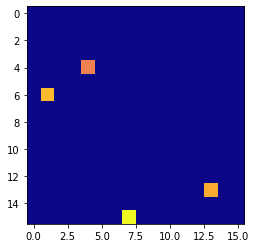

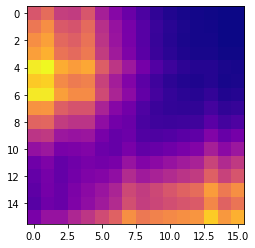

In [10]:
from matplotlib import pyplot as plt
arquivo = open('entrada.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

from matplotlib import pyplot as plt
arquivo = open('resultado.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()